In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import glob
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter, find_peaks

In [2]:
font = {'size'   : 20}

matplotlib.rc('font', **font)

In [3]:
R0 = 99.7 #Ohm

colors = ['tab:red', 'tab:orange', 'tab:olive', 'tab:green', 'tab:cyan', 'tab:blue', 'tab:purple', 'tab:pink', 'tab:brown']

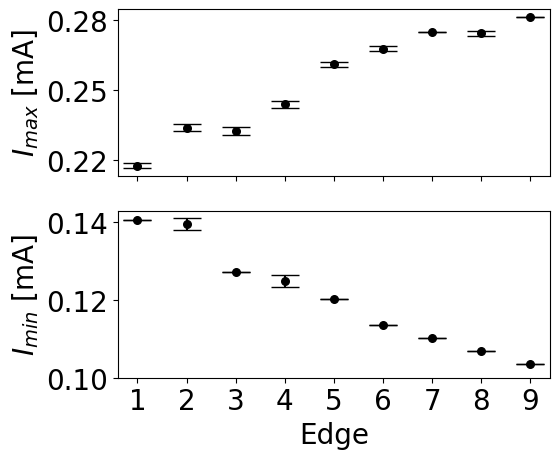

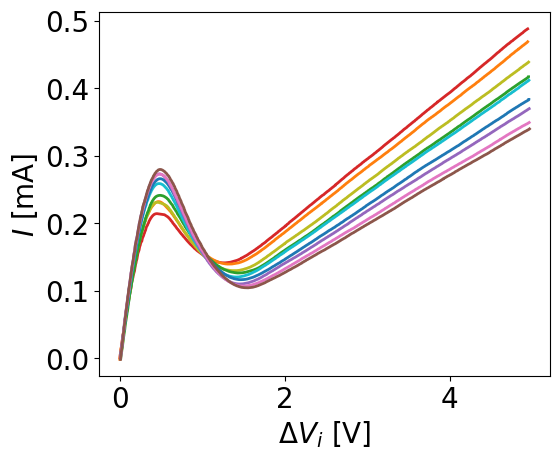

In [10]:
fig, (ax1, ax2) = plt.subplots(2,1, sharex=True, figsize=(6,5))

fig2, ax3 = plt.subplots(figsize=(6,5))

for edgei in range(1,10):

    fname = 'data/0925_IVcurves/edge{}.csv'.format(edgei)

    df = pd.read_csv(fname, skiprows=19)
#     df.Vr*= 1000/R0

    hiV,_ = find_peaks(df.dV)
#     plt.scatter(df.iloc[hiV].t, df.iloc[hiV].dV)
    
    loV,_ = find_peaks(-1*df.dV)
#     plt.scatter(df.iloc[loV].t, df.iloc[loV].dV)
    
    #get the ramp ups
    ups = []
    for upi in range(5):
        ups.append(df[loV[upi]:hiV[upi]])
    
    #get the ramp downs
    downs = []
    for downi in range(4):
        downs.append(df[hiV[downi]:loV[downi+1]])

    peaks = []
    valleys = []
#     plt.title('Downs {}'.format(edgei))
    for down in downs:
#         plt.plot(down.dV, down.Vr)
        down2 = down[down.dV < 1]
        down3 = down[down.dV > 1]
        peak,_ = find_peaks(down2.Vr, height=0.02, width=50)
        valley,_ = find_peaks(-1*down3.Vr, height=-0.02, distance=40, width=50)
#         plt.scatter(down2.iloc[peak[-1]].dV, down2.iloc[peak[-1]].Vr)
#         plt.scatter(down3.iloc[valley].dV, down3.iloc[valley].Vr)
        peaks.append(down2.iloc[peak[-1]])
        valleys.append(down3.iloc[valley])
#     plt.show()
        
#     plt.title('Ups {}'.format(edgei))
    for up in ups:
#         plt.plot(up.dV, up.Vr)
        up2 = up[up.dV < 1]
        up3 = up[up.dV > 1]
        peak,_ = find_peaks(up2.Vr, height=0.02)
#         valley = np.where(up3.Vr == np.min(up3.Vr))
        valley,_ = find_peaks(-1*up3.Vr, height=-0.02, distance=20, width=50)
#         plt.scatter(up2.iloc[peak].dV, up2.iloc[peak].Vr)
#         plt.scatter(up3.iloc[valley].dV, up3.iloc[valley].Vr)
        peaks.append(up2.iloc[peak[-1]])
        valleys.append(up3.iloc[valley])
        
#     plt.show()

    ax3.plot(downs[-1].dV, savgol_filter(downs[-1].Vr*1000/R0, 100,3), color=colors[edgei-1], label=edgei, linewidth=2)
              
    peaks = pd.DataFrame(peaks)
    valleys = pd.concat(valleys)

    peaks['I'] = peaks.Vr*1000/R0
    valleys['I'] = valleys.Vr*1000/R0
    
#     plt.plot(df.dV, df.Vr, zorder=0, c='k')
#     plt.xlim(0,2)
#     plt.ylim(0.01, 0.03)
#     plt.scatter(peaks.dV, peaks.Vr)
#     plt.scatter(valleys.dV, valleys.Vr)

    ax1.scatter(edgei, np.mean(peaks.I), c='k', s=30)
    ax1.errorbar(edgei, np.mean(peaks.I), yerr = np.std(peaks.I), c='k', capsize=10)
    
    ax2.scatter(edgei, np.mean(valleys.I), c='k', s=30)
    ax2.errorbar(edgei, np.mean(valleys.I), yerr = np.std(valleys.I), c='k', capsize=10)
    
maxlabels = [0.22, 0.25, 0.28]
ax1.set_yticks(maxlabels)
# ax1.set_yticklabels(maxlabels, fontsize=10)
minlabels = [0.10, 0.12, 0.14]
ax2.set_yticks(minlabels)
ax2.set_xlabel('Edge')
ax2.set_xticks(np.arange(1,10))

ax1.set_ylabel(r'$I_{max}$ [mA]')
ax2.set_ylabel(r'$I_{min}$ [mA]')

fig.tight_layout()

ax3.set_xlabel(r'$\Delta V_i$ [V]')
ax3.set_ylabel(r'$I$ [mA]')
# ax3.legend(title='Edge number', bbox_to_anchor = (1.1, 1.))
fig2.tight_layout()

fig.savefig('figures/Imax_Imin_compare9.png')
fig2.savefig('figures/9_IVcurves_compare.png')

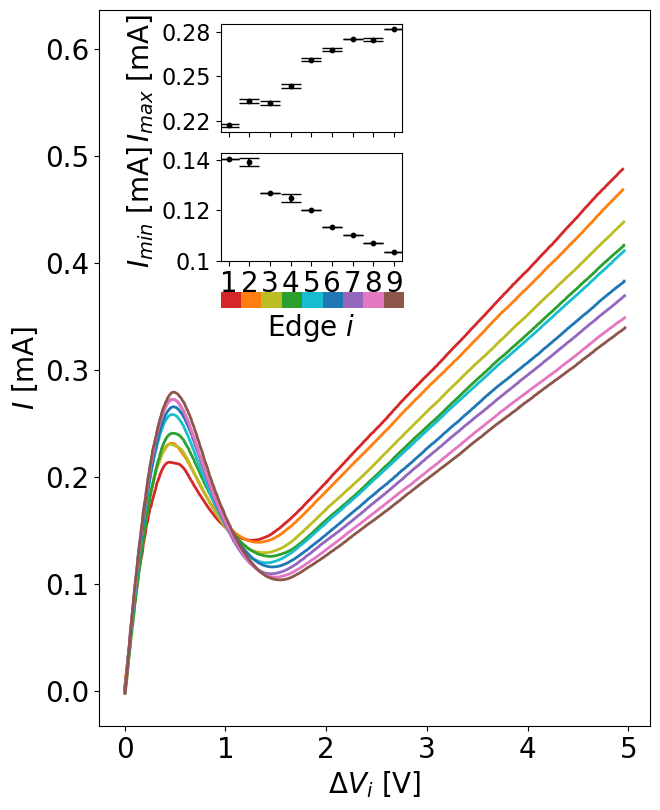

In [132]:
# fig, (ax1, ax2) = plt.subplots(2,1, sharex=True)
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.patches import Rectangle

fig2, ax3 = plt.subplots(figsize=(7,8.5))
# ax1 = inset_axes(ax3, width="30%", height="20%", loc=(0.1, 0.1))
width = 0.33
height = 0.15
xstart = 0.22
ystart = 0.65
sep = .03
ax1 = ax3.inset_axes([xstart, ystart+sep+height, width, height])
ax2 = ax3.inset_axes([xstart, ystart, width, height])
# ax2 = inset_axes(ax3, width="30%", height="20%", loc=4, borderpad=1)


for edgei in range(1,10):

    fname = 'data/0925_IVcurves/edge{}.csv'.format(edgei)

    df = pd.read_csv(fname, skiprows=19)
#     df.Vr*= 1000/R0

    hiV,_ = find_peaks(df.dV)
#     plt.scatter(df.iloc[hiV].t, df.iloc[hiV].dV)
    
    loV,_ = find_peaks(-1*df.dV)
#     plt.scatter(df.iloc[loV].t, df.iloc[loV].dV)
    
    #get the ramp ups
    ups = []
    for upi in range(5):
        ups.append(df[loV[upi]:hiV[upi]])
    
    #get the ramp downs
    downs = []
    for downi in range(4):
        downs.append(df[hiV[downi]:loV[downi+1]])

    peaks = []
    valleys = []
#     plt.title('Downs {}'.format(edgei))
    for down in downs:
#         plt.plot(down.dV, down.Vr)
        down2 = down[down.dV < 1]
        down3 = down[down.dV > 1]
        peak,_ = find_peaks(down2.Vr, height=0.02, width=50)
        valley,_ = find_peaks(-1*down3.Vr, height=-0.02, distance=40, width=50)
#         plt.scatter(down2.iloc[peak[-1]].dV, down2.iloc[peak[-1]].Vr)
#         plt.scatter(down3.iloc[valley].dV, down3.iloc[valley].Vr)
        peaks.append(down2.iloc[peak[-1]])
        valleys.append(down3.iloc[valley])
#     plt.show()
        
#     plt.title('Ups {}'.format(edgei))
    for up in ups:
#         plt.plot(up.dV, up.Vr)
        up2 = up[up.dV < 1]
        up3 = up[up.dV > 1]
        peak,_ = find_peaks(up2.Vr, height=0.02)
#         valley = np.where(up3.Vr == np.min(up3.Vr))
        valley,_ = find_peaks(-1*up3.Vr, height=-0.02, distance=20, width=50)
#         plt.scatter(up2.iloc[peak].dV, up2.iloc[peak].Vr)
#         plt.scatter(up3.iloc[valley].dV, up3.iloc[valley].Vr)
        peaks.append(up2.iloc[peak[-1]])
        valleys.append(up3.iloc[valley])
        
#     plt.show()

    ax3.plot(downs[-1].dV, savgol_filter(downs[-1].Vr*1000/R0, 100,3), color=colors[edgei-1], label=edgei, linewidth=2)
              
    peaks = pd.DataFrame(peaks)
    valleys = pd.concat(valleys)

    peaks['I'] = peaks.Vr*1000/R0
    valleys['I'] = valleys.Vr*1000/R0
    
#     plt.plot(df.dV, df.Vr, zorder=0, c='k')
#     plt.xlim(0,2)
#     plt.ylim(0.01, 0.03)
#     plt.scatter(peaks.dV, peaks.Vr)
#     plt.scatter(valleys.dV, valleys.Vr)

    ax1.scatter(edgei, np.mean(peaks.I), c='k', s=10)
    ax1.errorbar(edgei, np.mean(peaks.I), yerr = np.std(peaks.I), c='k', capsize=7)
    
    ax2.scatter(edgei, np.mean(valleys.I), c='k', s=10)
    ax2.errorbar(edgei, np.mean(valleys.I), yerr = np.std(valleys.I), c='k', capsize=7)
    
# ax1.set_xlabel('Edge', fontsize=10)
ax1.set_xticks(np.arange(1,10))
ax1.set_xticklabels([])
# ax1.set_xticklabels(np.arange(1,10), fontsize=10)
    
    
ax2.set_xlabel(r'Edge $i$')
ax2.xaxis.labelpad = 10
ax2.set_xticks(np.arange(1,10))
ax2.set_xticklabels(np.arange(1,10))

ax1.set_ylabel(r'$I_{max}$ [mA]')
ax2.set_ylabel(r'$I_{min}$ [mA]')
# ax1.set_ylabel(r'{\fontsize{20pt}{3em}\selectfont{}$I_{max}$}{\fontsize{16pt}{3em}\selectfont{}[mA]}')
# ax2.set_ylabel(r'{\fontsize{20pt}{3em}\selectfont{}$I_{min}$}{\fontsize{16pt}{3em}\selectfont{}[mA]}')
maxlabels = [0.22, 0.25, 0.28]
ax1.set_yticks(maxlabels)
ax1.set_yticklabels(maxlabels, fontsize=16)
minlabels = [0.10, 0.12, 0.14]
ax2.set_yticks(minlabels)
ax2.set_yticklabels(minlabels, fontsize=16)

fig.tight_layout()

ax3.set_xlabel(r'$\Delta V_i$ [V]')
ax3.set_ylabel(r'$I$ [mA]')
# rect = Rectangle((-0.1, 0.), linewidth=1, edgecolor='k', facecolor='none')
# ax2.add_patch(rect)
# ax3.legend(title='Edge number')
for i,c in enumerate(colors):
    rect = Rectangle((xstart + i*width/8.9, ystart-2.2*sep), width/8.9, width/15, linewidth=1, edgecolor='none', facecolor=c, transform=ax3.transAxes)
    ax3.add_patch(rect)
fig2.tight_layout()

# fig.savefig('figures/Imax_Imin_compare9.png')
fig2.savefig('figures/9_IVcurves_combined.png')

0
1
2
3
4
5
6
7
8


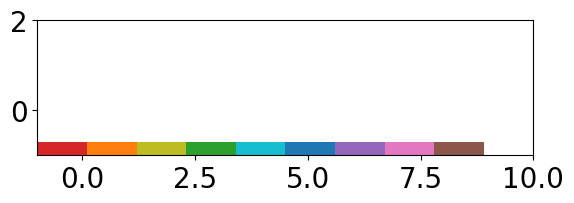

In [70]:
f, ax = plt.subplots()
ax.set_xlim(-1, 10)
ax.set_ylim(-1, 2)
ax.set_aspect('equal')
for i,c in enumerate(colors):
    print(i)
    rect = Rectangle((i*0.1, 0), .1, .1, linewidth=1, edgecolor='none', facecolor=c, transform=ax.transAxes)
    ax.add_patch(rect)


             t        Vr        dV         I
1791 -1.299784  0.021708  0.430279  0.217731
3561 -0.301469  0.021708  0.452440  0.217731
5333  0.697975  0.021708  0.456134  0.217731
7111  1.700802  0.021708  0.426585  0.217731
202  -2.196012  0.021373  0.537394  0.214371
1964 -1.202209  0.021708  0.474602  0.217731
3737 -0.202201  0.021708  0.478296  0.217731
5517  0.801754  0.021708  0.515232  0.217731
7287  1.800070  0.021708  0.500458  0.217731


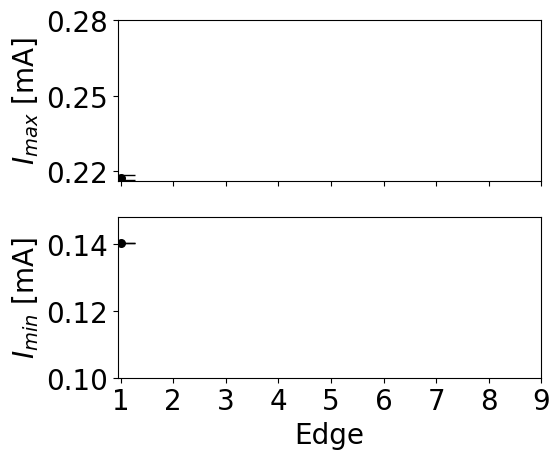

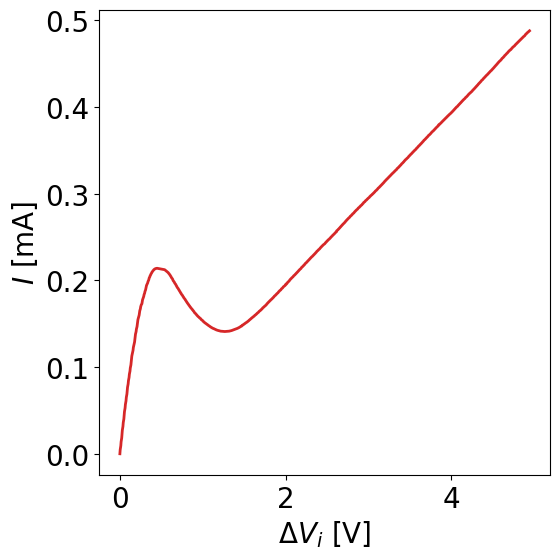

In [8]:
fig, (ax1, ax2) = plt.subplots(2,1, sharex=True, figsize=(6,5))

fig2, ax3 = plt.subplots(figsize=(6,6))

for edgei in range(1,2):

    fname = 'data/0925_IVcurves/edge{}.csv'.format(edgei)

    df = pd.read_csv(fname, skiprows=19)

    hiV,_ = find_peaks(df.dV)
    
    loV,_ = find_peaks(-1*df.dV)
    
    #get the ramp ups
    ups = []
    for upi in range(5):
        ups.append(df[loV[upi]:hiV[upi]])
    
    #get the ramp downs
    downs = []
    for downi in range(4):
        downs.append(df[hiV[downi]:loV[downi+1]])

    peaks = []
    valleys = []
    for down in downs:
        down2 = down[down.dV < 1]
        down3 = down[down.dV > 1]
        peak,_ = find_peaks(down2.Vr, height=0.02, width=50)
        valley,_ = find_peaks(-1*down3.Vr, height=-0.02, distance=40, width=50)
        peaks.append(down2.iloc[peak[-1]])
        valleys.append(down3.iloc[valley])
        
    for up in ups:
        up2 = up[up.dV < 1]
        up3 = up[up.dV > 1]
        peak,_ = find_peaks(up2.Vr, height=0.02)
        valley,_ = find_peaks(-1*up3.Vr, height=-0.02, distance=20, width=50)
        peaks.append(up2.iloc[peak[-1]])
        valleys.append(up3.iloc[valley])
        

    ax3.plot(downs[-1].dV, savgol_filter(downs[-1].Vr*1000/R0, 100,3), color=colors[edgei-1], label=edgei, linewidth=2)
              
    peaks = pd.DataFrame(peaks)
    valleys = pd.concat(valleys)

    peaks['I'] = peaks.Vr*1000/R0
    valleys['I'] = valleys.Vr*1000/R0
    
    print(peaks)

    ax1.scatter(edgei, np.mean(peaks.I), c='k', s=30)
    ax1.errorbar(edgei, np.mean(peaks.I), yerr = np.std(peaks.I), c='k', capsize=10)
    
    ax2.scatter(edgei, np.mean(valleys.I), c='k', s=30)
    ax2.errorbar(edgei, np.mean(valleys.I), yerr = np.std(valleys.I), c='k', capsize=10)
    
maxlabels = [0.22, 0.25, 0.28]
ax1.set_yticks(maxlabels)
minlabels = [0.10, 0.12, 0.14]
ax2.set_yticks(minlabels)
ax2.set_xlabel('Edge')
ax2.set_xticks(np.arange(1,10))

ax1.set_ylabel(r'$I_{max}$ [mA]')
ax2.set_ylabel(r'$I_{min}$ [mA]')

fig.tight_layout()

ax3.set_xlabel(r'$\Delta V_i$ [V]')
ax3.set_ylabel(r'$I$ [mA]')
fig2.tight_layout()

# fig.savefig('figures/Imax_Imin_compare9.png')
# fig2.savefig('figures/9_IVcurves_compare.png')